In [1]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [1]:
#Import packages
import pandas as pd
import re, string
import nltk
import nltk.sentiment.util
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
import numpy as np
import os
import math

sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

#The function
def clean_text(text):
    
    #Remove symbols and Emojis
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Correct Spelling    
#     textBlb = TextBlob(text)            
#     text = str(textBlb.correct())
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    
    #Lemmatize
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    
    #Mark Negation
    tokens_neg_marked = nltk.sentiment.util.mark_negation(text)
    
    #Remove stopwords
    text = [t for t in tokens_neg_marked
             if t.replace("_NEG", "").isalnum() and
             t.replace("_NEG", "") not in sw]
    
    return text

In [3]:
df_outer = pd.read_excel('02_Resources/Climate_change_links.xlsx')
for index, row in df_outer.iterrows():
    if not (math.isnan(row['Effectiveness'])):
        path = '03_Processed_Comments/' + row['VideoID']

        # Check whether the specified path exists or not
        isExist = os.path.exists(path)

        if not isExist:
          #Create a new directory because it does not exist 
          os.makedirs(path)
          print("The new directory is created!")

        df = pd.read_json('01_Comments/' + row['VideoID'] + '.json', lines=True)
        
        #Get sentiment from comments
#         df['text'] = [str(thing) for thing in df['text']]
#         sentiment = []
#         for i in range(len(df)):
#             blob = TextBlob(df['text'][i])
#             for sentence in blob.sentences:
#                 sentiment.append(sentence.sentiment.polarity)
#         df['sentiment']=sentiment
        
        df['text'] = df['text'].apply(lambda x: clean_text(x))

        all_words=[]        
        for i in range(len(df)):
            all_words = all_words + df['text'][i]

        df.to_json('03_Processed_Comments/' + row['VideoID'] + '/' + row['VideoID'] + '.json', orient="records", lines=True)
        df_csv = pd.DataFrame(all_words)
        df_csv.to_csv('03_Processed_Comments/' + row['VideoID'] + '/' + row['VideoID'] + '_all_words.csv', index = False)

The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new di

In [2]:
df = pd.read_json('01_Comments/5scez5dqtAc.json', lines=True)

df['text'] = df['text'].apply(lambda x: clean_text(x))

print(df['text'].iloc[0]) 

['im', 'watch', 'trump', 'biden', 'ha', 'already', 'start', 'process', 'return', 'paris', 'agreement']


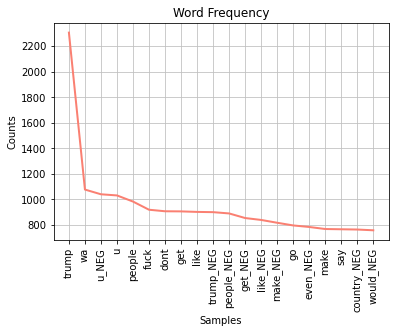

In [3]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(df)):
    all_words = all_words + df['text'][i]
#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

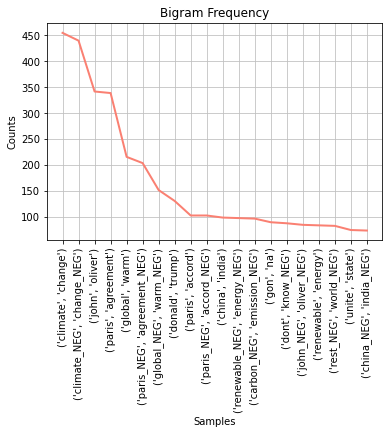

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [4]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

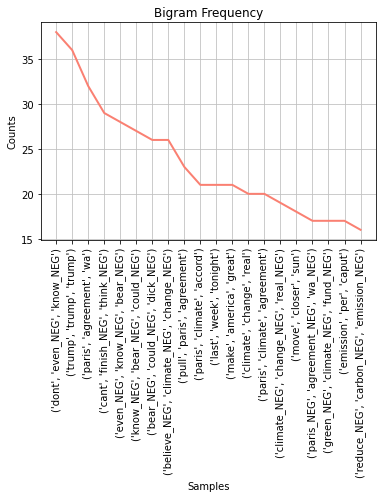

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [5]:
#Bigrams
trigrm = list(nltk.trigrams(all_words))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

<AxesSubplot:title={'center':'Comments Polarity'}, ylabel='Frequency'>

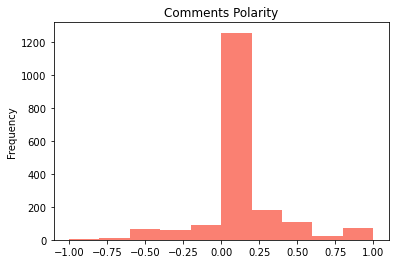

In [8]:
#Get sentiment from comments
df['text'] = [str(thing) for thing in df['text']]
sentiment = []
for i in range(len(df)):
    blob = TextBlob(df['text'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
df['sentiment']=sentiment
#Plot
df['sentiment'].plot.hist(color='salmon', title='Comments Polarity')

In [9]:
df["sentiment"].mean()

0.07766406691631689

In [10]:
print(df['text'].iloc[0])

['head', 'shop', 'get', 'exclusive', 'kurzgesagt', 'merch', 'sciency', 'product', 'design', 'love', 'get', 'something', 'kurzgesagt', 'shop', 'best', 'way', 'support', 'u', 'keep', 'video', 'free', 'everyone', 'worldwide', 'ship', 'available']
